
Checking for Missing Values:
index            0
Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64


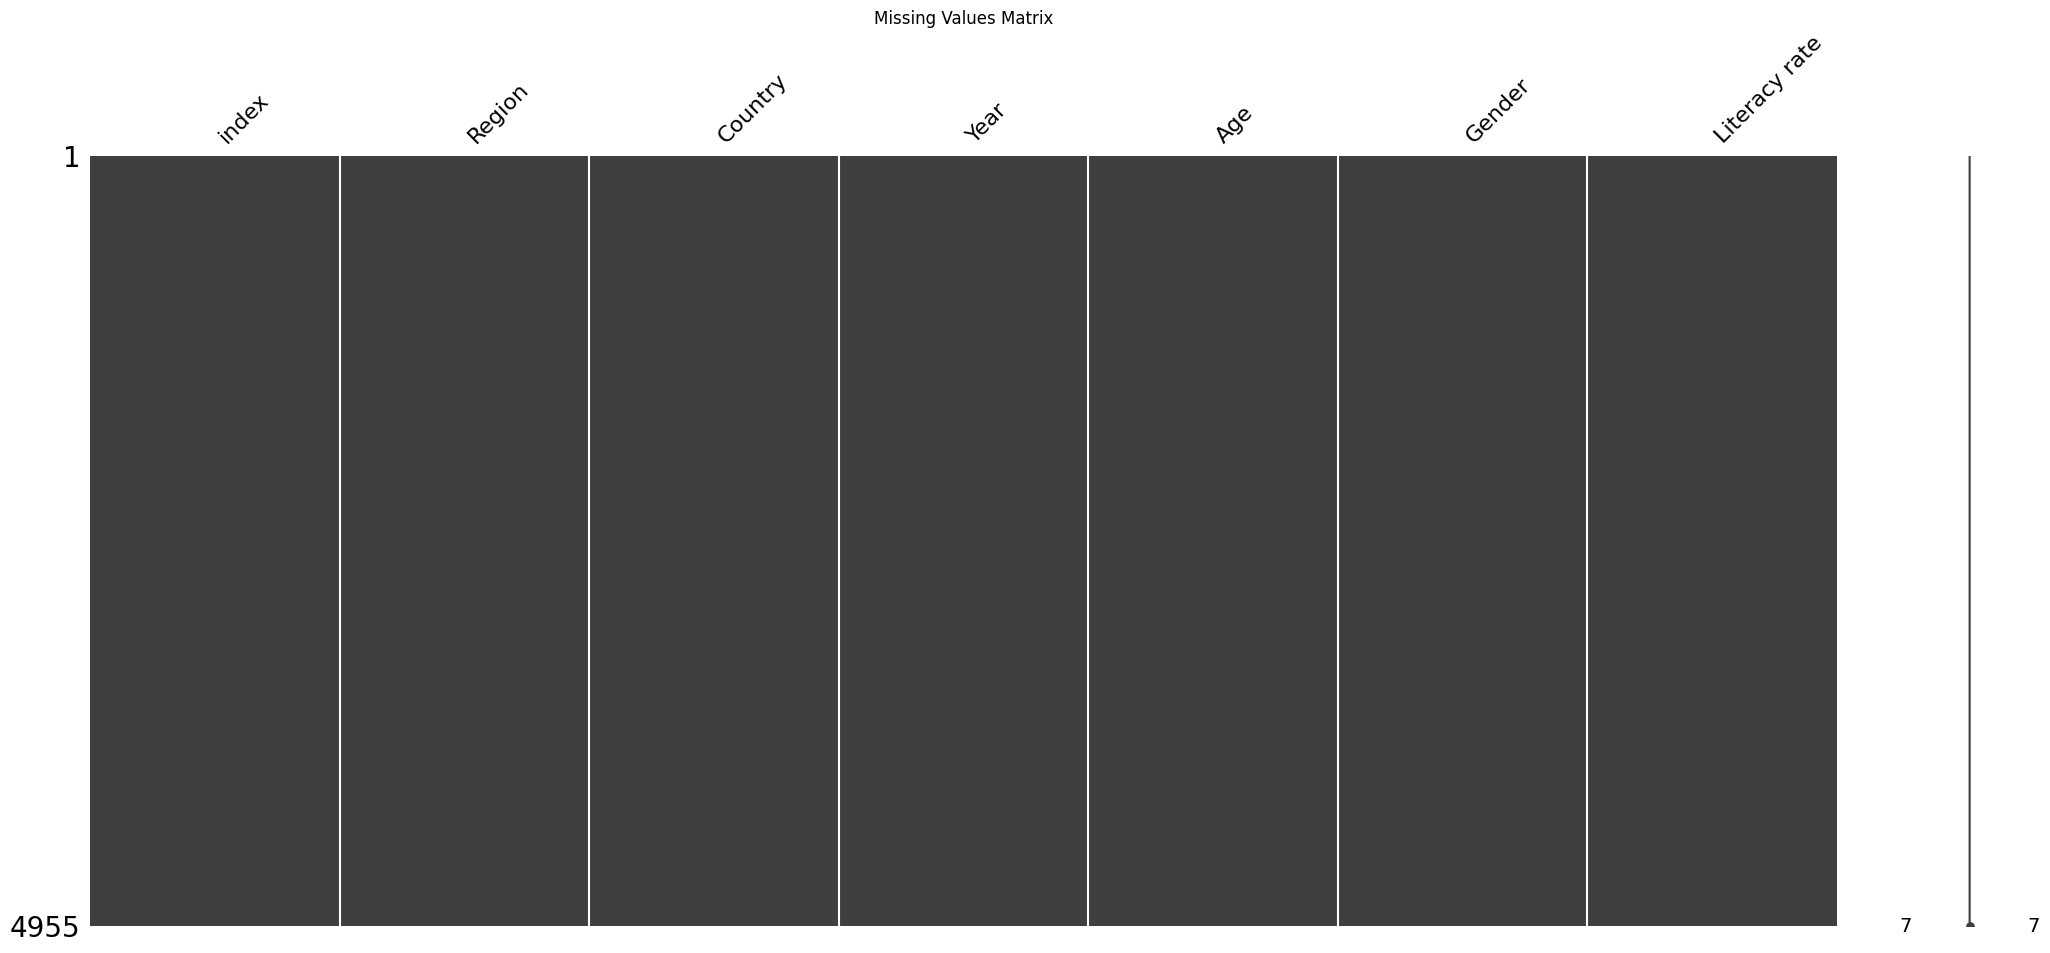


Number of Duplicate Rows: 0

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4955 non-null   float64
 1   Region         4955 non-null   object 
 2   Country        4955 non-null   object 
 3   Year           4955 non-null   int64  
 4   Age            4955 non-null   object 
 5   Gender         4955 non-null   object 
 6   Literacy rate  4955 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 271.1+ KB
None

Sample Cleaned Data:
     index                     Region      Country  Year    Age  Gender  \
0  2477.5  Central and Southern Asia  Afghanistan  2011    15+  female   
1     1.0  Central and Southern Asia  Afghanistan  2011    15+    male   
2     2.0  Central and Southern Asia  Afghanistan  2011    15+   total   
3     3.0  Central and Southern Asia  Afghanistan  201

<ipython-input-4-bbcaf4fcddb4>:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
file_path = '/content/Literacy rates (no pw2).csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Check for null values
print("\nChecking for Missing Values:")
print(data.isnull().sum())

# Step 2: Visualize Missing Values
msno.matrix(data)
plt.title("Missing Values Matrix")
plt.show()

# Step 3: Handle Missing or Invalid Values
# Replace invalid/missing values in numeric columns with NaN and fill with median
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    data[col] = data[col].replace(0, None)  # Replace 0s if considered invalid
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Step 4: Remove Duplicate Rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
data = data.drop_duplicates()

# Summary of cleaned data
print("\nCleaned Data Information:")
print(data.info())
print("\nSample Cleaned Data:\n", data.head())

# Step 5: Feature Normalization and Target Separation
# Example: Assuming 'Sales' is the target variable
target_column = 'Literacy rate'
features = data.drop(columns=[target_column])  # Drop target column
target = data[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Check the split
print(f"\nTraining Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")




Training Set Shape: X_train: (3964, 6), y_train: (3964,)
Testing Set Shape: X_test: (991, 6), y_test: (991,)
